# Описание

Задача: предсказать статус клиента банка на основе исторических данных. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Целевой признак
Exited — факт ухода клиента

## Подготовка данных

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install catboost
import catboost as cb
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


Загрудаем данные

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/uchitel/Churn.csv')


Mounted at /content/drive


In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Убираю лишние столбцы и преобразую названия оставшихся столбцов.

In [ ]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [ ]:
#Для удобства преобразую названия признаков
df.columns = df.columns.str.lower()
df = df.rename(columns = {'creditscore':'credit_score',
                          'numofproducts':'num_of_products', 'hascrcard':'has_cr_card', 'isactivemember':'is_active_member',
                         'estimatedsalary':'estimated_salary'})

In [ ]:
df.corr()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
credit_score,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_cr_card,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
is_active_member,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [ ]:
# Удалю строку с пропусками
df = df[df['tenure'].notna()]

# Исследовательский анализ данных

In [ ]:
df

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


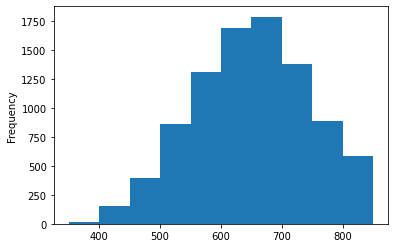

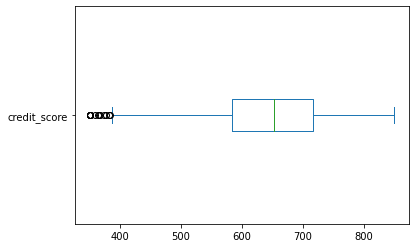

In [ ]:
#Рассмотрю распределение кредитного рейтинга клиентов в выборке
df.credit_score.plot(kind = 'hist')
plt.show()
df.credit_score.plot(kind = 'box', vert=False)
plt.show()

In [ ]:
df.geography.value_counts()

France     4550
Germany    2293
Spain      2248
Name: geography, dtype: int64

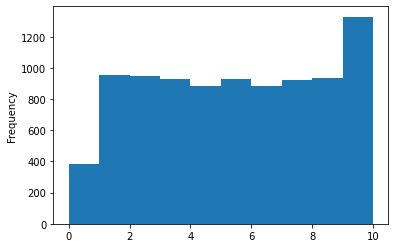

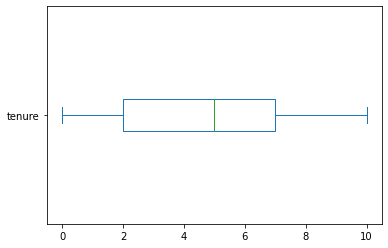

In [ ]:
#Рассмотрю распределение лет
df.tenure.plot(kind = 'hist')
plt.show()
df.tenure.plot(kind = 'box', vert=False)
plt.show()

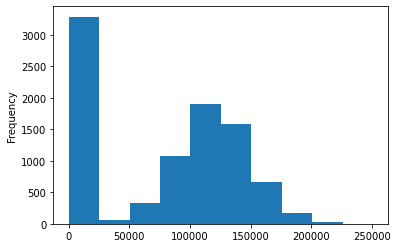

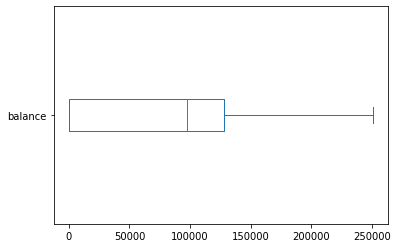

In [ ]:
#Рассмотрю распределение лет
df.balance.plot(kind = 'hist')
plt.show()
df.balance.plot(kind = 'box', vert=False)
plt.show()

In [ ]:
disbalance = df.exited.value_counts()
disbalance

0    7237
1    1854
Name: exited, dtype: int64

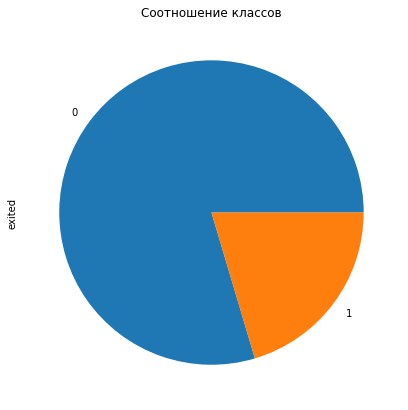

In [ ]:
disbalance.plot(kind='pie',figsize = (7,7))
plt.title('Соотношение классов');

Явных аномалий и выбросов нет. Дисбаланс дальше устраним

# Подбор модели

Преобразую категориальные признаки (Geography, Gender) в численные.

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
RANDOM_STATE = 12345

In [ ]:
#разделю данные на выборки
target = df['exited']
features = df.drop('exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, stratify = target, test_size=0.25, random_state=RANDOM_STATE)


В предосталенных данных есть дисбаланс классов. Отрицательных классов в 3 раза больше. Решим эту проблему.

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train, target_train = upsample(features_train, target_train, 4)


In [ ]:
target_train.value_counts()

1    5560
0    5428
Name: exited, dtype: int64

## Логистическая Регрессия

In [ ]:
M_LR = LogisticRegression(random_state=12345, solver='liblinear', max_iter=100)
M_LR.fit(features_train, target_train)
predicted_LR = M_LR.predict(features_test)
f1 = f1_score(target_test, predicted_LR)
auc_roc = roc_auc_score(target_test, predicted_LR)

print('Случайный лес, f1 =', f1, ', auc_roc = ', auc_roc)

Случайный лес, f1 = 0.45504840940525587 , auc_roc =  0.6740394054631059


## Дерево решений

In [ ]:
param = {'max_depth': [1,3,5,7,9,10,15]}
dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
search = GridSearchCV(dtc, param, scoring='f1', cv=3)
search.fit(features_train, target_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 15}
0.9033571394470821


In [ ]:
dtc = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = 15)
dtc.fit(features_train, target_train)
predicted_dtc = dtc.predict(features_test)
f1 = f1_score(target_test, predicted_dtc)
auc_roc = roc_auc_score(target_test, predicted_dtc)

print('Дерево решений, f1 =', f1, ', auc_roc = ', auc_roc)

Дерево решений, f1 = 0.521484375 , auc_roc =  0.7067315481977088


## Случайный лес

In [ ]:
param = {'max_depth': [1,5,15,20,30],
         'n_estimators': [10,50,100]}
M_RF = RandomForestClassifier(random_state=RANDOM_STATE)
search = GridSearchCV(M_RF, param, scoring='f1', cv=3)
search.fit(features_train, target_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 30, 'n_estimators': 50}
0.9466745952237186


In [ ]:
M_RF = RandomForestClassifier(max_depth = 30, n_estimators = 50,random_state=RANDOM_STATE)
M_RF.fit(features_train, target_train)
predicted_rf = dtc.predict(features_test)

f1 = f1_score(target_test, predicted_rf)
auc_roc = roc_auc_score(target_test, predicted_rf)

print('Случайный лес, f1 =', f1, ', auc_roc = ', auc_roc)

Случайный лес, f1 = 0.521484375 , auc_roc =  0.7067315481977088


## CatBoost

In [ ]:
params = {'depth':[3,6,10],
          'iterations':[250,100],
          'learning_rate':[0.1,0.3]}
M_CB = cb.CatBoostClassifier(random_state=RANDOM_STATE, task_type = 'GPU', silent = True)
search = GridSearchCV(M_CB, params, scoring='f1', cv=3)
search.fit(features_train, target_train)
print(search.best_params_)
print(search.best_score_)

{'depth': 10, 'iterations': 250, 'learning_rate': 0.3}
0.9441627089699726


In [ ]:
M_CB = cb.CatBoostClassifier(depth = 10, iterations = 250, learning_rate = 0.3, random_state=RANDOM_STATE, task_type = 'GPU', silent = True)
M_CB.fit(features_train, target_train)
predicted_rf = M_CB.predict(features_test)

f1 = f1_score(target_test, predicted_rf)
auc_roc = roc_auc_score(target_test, predicted_rf)

print('Случайный лес, f1 =', f1, ', auc_roc = ', auc_roc)

Случайный лес, f1 = 0.5819861431870671 , auc_roc =  0.7300923543203524


Промежуточные выводы:
1. Преобразованы категориальные признаки в численные.
2. Обучены модели - дерево решений, случайный лес, логистическая регрессия CatBost.
3. Лучший показатель f1 у модели CatBoost = 0.58

## Выводы

1. Обработаны полученные данные:
- Удалены ненужные столбцы;
- Удалены объекты с пропущенными данными.
2. Устранен дисбаланс классов:
- Проведено масштабирование признаков;
- Увеличина выборка положительных объектов;
- уменьшена выборка отрицательных объектов.
3. Проведено обучение на равзных моделях с подбором отпимальных гиперпараметров.
5. Лучший результат показала модель CatBoost с значениями f1 = 0.58.
